# Data Download and sorting into directories

In [1]:
import urllib.request
import zipfile
train_url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
val_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

file_name = "horse-or-human.zip"
val_file_name = "validation-horse-or-human.zip"
training_dir = 'horse-or-human/training/'
validation_dir = 'horse-or-human/validation'

# urllib.request.urlretrieve(train_url, file_name)
# zip_ref = zipfile.ZipFile(file_name, 'r')
# zip_ref.extractall(training_dir)
# zip_ref.close()

# urllib.request.urlretrieve(val_url, val_file_name)
# zip_ref = zipfile.ZipFile(val_file_name, 'r')
# zip_ref.extractall(validation_dir)
# zip_ref.close()

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.optimizers import RMSprop
import PIL

2024-01-04 15:21:01.212415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 15:21:01.212453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 15:21:01.213883: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 15:21:01.221882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-04 15:21:02.006624: W tensorflow/compiler/tf2

# Using image data generator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images have values ranging from 0 to 255. We want 0 to 1
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (300, 300),
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [4]:
model = Sequential([
    layers.Conv2D(
        16, (3, 3),
        activation = 'relu',
        input_shape = (300, 300, 3)
    ),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(
        32, (3, 3),
        activation = 'relu'
    ),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(
        64, (3, 3),
        activation = 'relu'
    ),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(
        64, (3, 3),
        activation = 'relu'
    ),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(
        64, (3, 3),
        activation = 'relu'
    ),
    layers.MaxPool2D(2, 2),
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

2024-01-04 15:21:02.677729: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-04 15:21:02.745261: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-04 15:21:02.745524: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [6]:
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = train_datagen.flow_from_directory(
  validation_dir,
  target_size=(300, 300),
  class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.80 and logs.get('val_accuracy')>=0.80):
      self.model.stop_training = True
callbacks = myCallback()

In [8]:

model.fit(train_generator,
          epochs=15, validation_data=validation_generator,
          callbacks=[callbacks])

Epoch 1/15


2024-01-04 15:21:04.492860: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-04 15:21:06.884075: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5af0899b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-04 15:21:06.884134: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-01-04 15:21:06.896758: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1704361867.009173    4926 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 [==============================] - 15s 240ms/step - loss: 0.7103 - accuracy: 0.5988 - val_loss: 0.5109 - val_accuracy: 0.8047
Epoch 2/15
33/33 [==============================] - 7s 201ms/step - loss: 0.5330 - accuracy: 0.7702 - val_loss: 0.5633 - val_accuracy: 0.8047
Epoch 3/15
33/33 [==============================] - 7s 201ms/step - loss: 0.2470 - accuracy: 0.9085 - val_loss: 0.8194 - val_accuracy: 0.8438


In [9]:
model.save("HorseHuman_3.0.4")

INFO:tensorflow:Assets written to: HorseHuman_3.0.4/assets


INFO:tensorflow:Assets written to: HorseHuman_3.0.4/assets


In [10]:
# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()

# Testing

In [11]:
import cv2
import os

In [12]:
x_test=[]

test_path = "test_2.0"
# test_path="horse-or-human/training"
horse_test_folder = "horses"
human_test_folder = "humans"
sub_path=test_path+"/"+horse_test_folder
count1=0
for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(300,300))
    x_test.append(img_arr)
    count1=count1+1

print(f"Number of horses = {count1}")
sub_path=test_path+"/"+human_test_folder
count2=0
for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(300,300))
    x_test.append(img_arr)
    count2=count2+1
print(f"Number of humans = {count2}")

Number of horses = 77
Number of humans = 97


In [13]:
test_x=np.array(x_test)
test_x.shape

(174, 300, 300, 3)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_path,
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary')
test_y=test_set.classes

Found 174 images belonging to 2 classes.


In [15]:
HorseHuman_3_0_2 = tf.keras.saving.load_model("HorseHuman_1.0")
HorseHuman_3_0_2.evaluate(test_x,test_y,batch_size=32)

6/6 [==============================] - 1s 183ms/step - loss: 1249.8986 - accuracy: 0.5460


[1249.8985595703125, 0.545976996421814]

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [27]:
#predict
y_pred=HorseHuman_3_0_2.predict(test_x)
y_pred = np.round(y_pred).astype(int).ravel()
#get classification report
print(classification_report(y_pred,test_y))

6/6 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

           0       0.61      0.49      0.54        96
           1       0.49      0.62      0.55        78

    accuracy                           0.55       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.56      0.55      0.55       174



In [18]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [19]:
ind = test_y == y_pred
count=0
for i in ind:
    if i==False:
        count=count+1
print(count)
# ind

79


In [20]:
from keras.preprocessing import image
def load_img(filename):
    img_width, img_height = 300, 300
    img = image.load_img(filename, target_size = (img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    return img

In [21]:
human1f="/home/hridyanshu/Desktop/deeplearning/emailclassifier/test_1.0/humans/6463_black-man-in-a-white-suit-walking.jpg"
img = load_img(human1f)
img.shape
# HorseHuman_3_0_1.predict(human1f)

(1, 300, 300, 3)

In [22]:
# HorseHuman_3_0_1.predict(human1f)
single_test = HorseHuman_3_0_2.predict(test_x)
# HorseHuman_3_0_1.input_shape

6/6 [==============================] - 0s 15ms/step


In [23]:
single_test

array([[1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [24]:
1-(146/287)

0.49128919860627174

In [25]:
HorseHuman_3_0_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

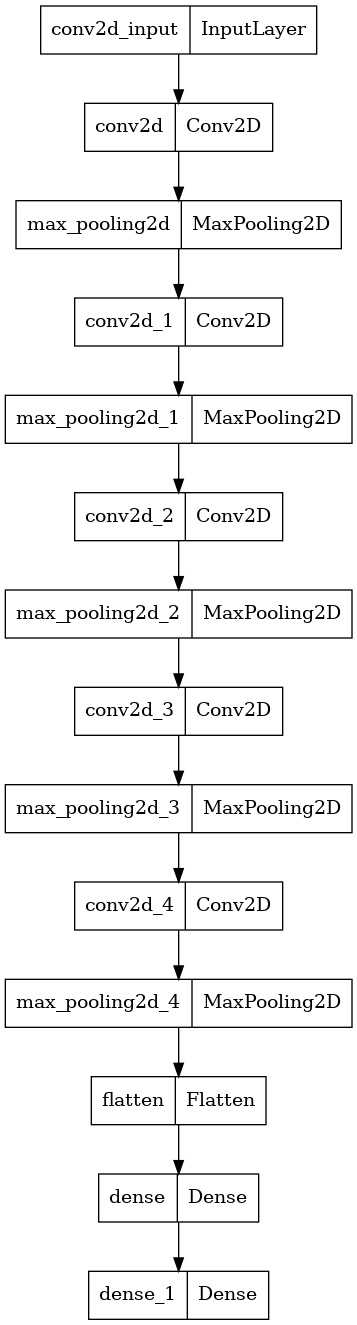

In [26]:
tf.keras.utils.plot_model(
    HorseHuman_3_0_2,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)
